## 1. Exploratory Data Analysis

### Viewing the first 5 rows of the dataset. Each row represents one ride booking.

The columns include:
- **Date** and **Time** of the booking
- **Booking ID** and **Customer ID** (unique for each ride and customer)
- **Vehicle Type** (like Auto, Bike, Go Sedan, etc.)
- **Pickup and Drop Locations**
- **Avg VTAT** (Average time for driver to reach pickup location (in minutes))
- **Avg CTAT** (Average trip duration from pickup to destination (in minutes))
- **Booking Status** (whether the ride was completed, cancelled, etc.)
- **Booking Value** (total fare)
- **Ratings** (from customer and driver)
- **Payment Method** (UPI, Debit Card, etc.)

Some rows have missing values (like when the ride was incomplete or cancelled), which we'll explore and clean later.

In [1]:
# Loading the dataset

import pandas as pd

df = pd.read_csv('../data/ride_bookings.csv')

# Showing the first 5 rows

df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


### How big is the data?

Number of rows and columns in the table.  
Each row is one ride, and each column is a detail about that ride.

In [2]:
df.shape
# we have 150,000 rows and 21 columns

(150000, 21)

### Column names

Checking the names of all the columns in the dataset to know what information is included.

In [3]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

### Data types and missing values

Type of data is in each column (like text or numbers),  
and checking if anything is missing.

### What the Data Looks Like

- The dataset has **150,000 rows** (ride bookings) and **21 columns**.
- Most columns contain **text** (like dates, locations, IDs) or **numbers** (like ratings and distances).
- Columns like **Avg VTAT**, **Avg CTAT**, **Booking Value**, and **Ratings** are numbers (float).
- Columns like **Booking Status**, **Vehicle Type**, and **Payment Method** are text (object).
- Some columns have missing values:
  - **Avg VTAT** is missing in about 10,500 rides
  - **Avg CTAT**, **Booking Value**, and **Ride Distance** are missing in about 48,000 rides
  - **Ratings** (driver and customer) are missing in 57,000 rides
  - **Cancellation and Incomplete ride columns** have very few values, because they only apply to cancelled/incomplete rides


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

### Summary of the numbers and insights from the columns

Quick stats about the number columns, like the average, minimum, and maximum values.

- **Driver arrival time (Avg VTAT)** is around **8.5 minutes** on average, with most drivers arriving between **5.3 and 11.3 minutes**.
- **Trip duration (Avg CTAT)** averages **29 minutes**, but some trips last as short as **10 mins** or as long as **45 mins**.
- **All cancellation and incomplete ride columns only contain 1s**, meaning they are probably just **flags** (1 = yes, 0 = no), not actual counts.
- **Average ride fare (Booking Value)** is about **508**, with some trips costing as low as **50** and others going up to over **4,200** (likely long distance or UberXL).
- **Ride distance** is around **24.6 km** on average, but it ranges from **1 km** to **50 km**.
- **Customer ratings** are slightly higher (average **4.40**) than **driver ratings** (average **4.23**), but both are generally high.

Overall, most Uber rides are completed in under 30 minutes, cost around Ksh 500, and are rated highly by both drivers and customers.



In [5]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


### Missing values

Checking how many missing entries each column has.  
Columns with a high number of missing values might need to be cleaned, filled, or dropped depending on how important they are.

- Most of the missing values come from cancellation and incomplete ride columns. This makes sense because not all rides were cancelled or incomplete.
  - **141,000 rows** don’t have "Incomplete Ride" info (only 9,000 rides were incomplete)
  - **139,500 rows** don’t have customer cancellation info
  - **123,000 rows** don’t have driver cancellation info

- Ratings and trip details are also missing in many rows:
  - **57,000 rides** are missing either a driver or customer rating
  - **48,000 rides** don’t have trip details like distance, fare, or trip time (likely due to cancellation)

**Summary**

- Not all rides are cancelled or incomplete, so those columns are blank most of the time.
- Trip details like fare, distance, and duration are only available for completed rides.
- Some people didn’t leave a rating, so those are missing too.

- It's good that the main ride information (Date, Time, Booking ID, Status, Vehicle Type, Locations) is fully filled in, no missing values at all.

**Next step:** clean or safely ignore the columns with missing data, depending on what column we'll analyze.



In [6]:
df.isnull().sum().sort_values(ascending=False)


Incomplete Rides Reason              141000
Incomplete Rides                     141000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Driver Cancellation Reason           123000
Cancelled Rides by Driver            123000
Customer Rating                       57000
Driver Ratings                        57000
Ride Distance                         48000
Booking Value                         48000
Payment Method                        48000
Avg CTAT                              48000
Avg VTAT                              10500
Time                                      0
Drop Location                             0
Pickup Location                           0
Vehicle Type                              0
Customer ID                               0
Booking Status                            0
Booking ID                                0
Date                                      0
dtype: int64

## 2. Data Cleaning

### Checking for duplicate rows

This helps make sure our data is clean and doesn’t have repeated bookings.

From the output we don't have any repeated bookings

In [7]:
df.duplicated().sum()


0

### Date and Time columns 

Converting Date and Time to proper datetime format so we can extract useful features like hour, day, and month, and do any kind of timebased analysis.


In [8]:
# Combining 'Date' and 'Time' into one datetime column
df['Booking Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Dropping the original Date and Time columns since we no longer need them
df.drop(['Date', 'Time'], axis=1, inplace=True)


In [9]:
# confirming if the changes took place

df.head()

,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Booking Datetime
0,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-23 12:29:38
1,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,2024-11-29 18:01:39
2,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10
3,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25
4,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00


### Dropping columns with too many missing values

Columns like Reason for cancelling by Customer/ Driver Cancellation Reason/ Incomplete Rides Reason, had very few filled-in values and were only relevant for specific cases. 

We’ll still track cancellations using flags like 'Booking Status'.


In [10]:
df.drop([
    'Reason for cancelling by Customer',
    'Driver Cancellation Reason',
    'Incomplete Rides Reason'
], axis=1, inplace=True)


In [11]:
df.drop([
    'Cancelled Rides by Customer',
    'Cancelled Rides by Driver',
    'Incomplete Rides'
], axis=1, inplace=True)


### Removing rows with missing trip info

We removed rows that don’t have trip cost, distance, or time,
because they were most likely cancelled or incomplete.
We only want to analyze real, finished rides, not the ones that never happened.


In [12]:
df = df.dropna(subset=['Booking Value', 'Ride Distance', 'Avg CTAT'])


In [13]:
# Checking if all the changes took place after cleaning the data

# Final dataset has:
# 102,000 rows
# 14 columns
# All trip records are complete, clean, and ready for our next step.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102000 entries, 1 to 149999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Booking ID        102000 non-null  object        
 1   Booking Status    102000 non-null  object        
 2   Customer ID       102000 non-null  object        
 3   Vehicle Type      102000 non-null  object        
 4   Pickup Location   102000 non-null  object        
 5   Drop Location     102000 non-null  object        
 6   Avg VTAT          102000 non-null  float64       
 7   Avg CTAT          102000 non-null  float64       
 8   Booking Value     102000 non-null  float64       
 9   Ride Distance     102000 non-null  float64       
 10  Driver Ratings    93000 non-null   float64       
 11  Customer Rating   93000 non-null   float64       
 12  Payment Method    102000 non-null  object        
 13  Booking Datetime  102000 non-null  datetime64[ns]
dtypes: dateti

## 3. Data Analysis

### Rides Over Time



### Daily Number of Uber Rides


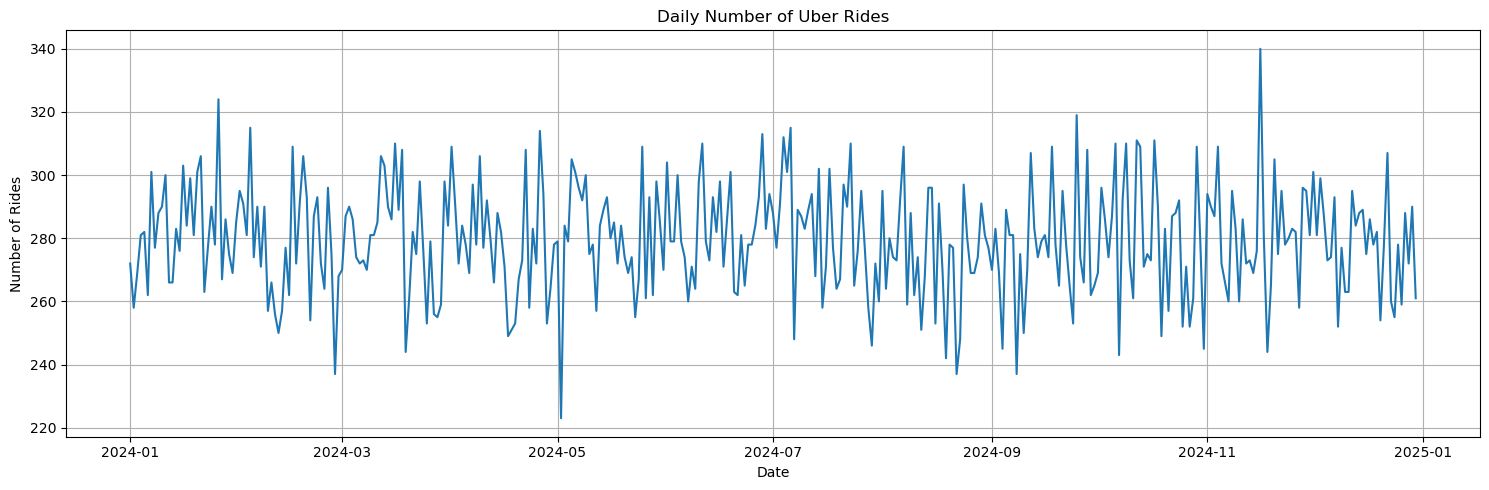

In [14]:
daily_trips = df['Booking Datetime'].dt.date.value_counts().sort_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
daily_trips.plot()
plt.title('Daily Number of Uber Rides')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.tight_layout()
plt.show()


The output line chart shows how many rides were taken each day in 2024.  

- The number of rides per day mostly stayed between 260 and 300.
- Some spikes appear in early March, mid-July, and November.
- A few noticeable drops happen in April and late December, possibly due to holidays or other issues.

Overall, Uber rides remained steady throughout the year with normal ups and downs.

### Monthly Uber Ride Volume 


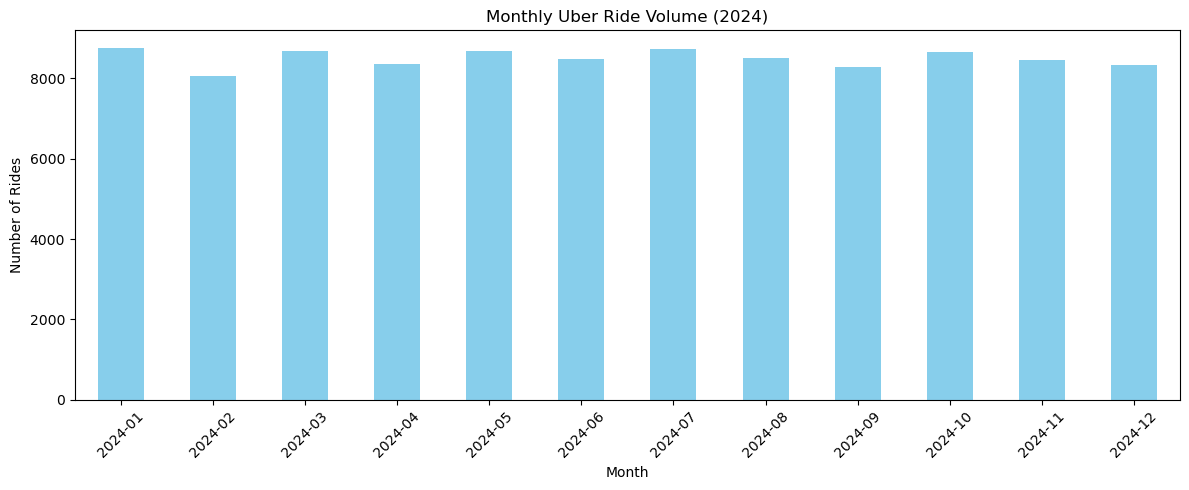

In [15]:
monthly_trips = df['Booking Datetime'].dt.to_period('M').value_counts().sort_index()

# Plot
monthly_trips.plot(kind='bar', figsize=(12,5), color='skyblue')
plt.title('Monthly Uber Ride Volume (2024)')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart shows how many Uber rides were completed each month in 2024.

- Overall, monthly ride volume stayed consistently high, averaging around 8,500–8,900 rides per month.
- February had the lowest number of rides, likely due to fewer days in the month.
- The busiest months were January, May, July, and October.
- No sharp drops or spikes, suggesting steady rider demand throughout the year.

This consistency is a good sign for planning resources, staffing, or marketing. Uber demand remained strong month-to-month.

### Uber Rides by Hour of the Day

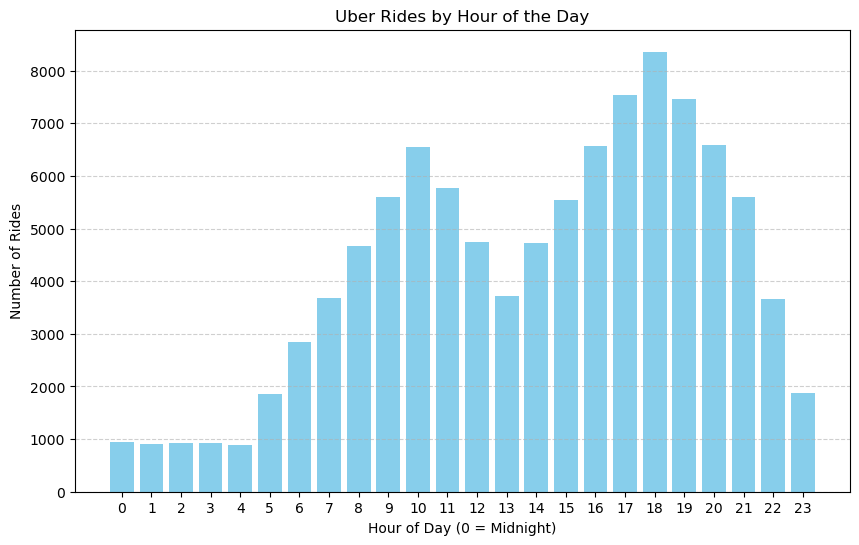

In [16]:
# Extracting hour from the booking datetime
df['Hour'] = df['Booking Datetime'].dt.hour

# Count number of rides per hour
hourly_rides = df['Hour'].value_counts().sort_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(hourly_rides.index, hourly_rides.values, color='skyblue')
plt.title('Uber Rides by Hour of the Day')
plt.xlabel('Hour of Day (0 = Midnight)')
plt.ylabel('Number of Rides')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



- Ride volume is lowest between midnight and 5 AM

- It starts rising sharply from 6 AM, peaking in the evening hours

- The busiest hours are between 5 PM and 8 PM, with a noticeable peak around 6 PM

- This suggests high demand during typical evening commute and after-work hours

Insight: Understanding peak hours can help optimize driver availability and improve service experience during high demand periods

### Most used vehicle types



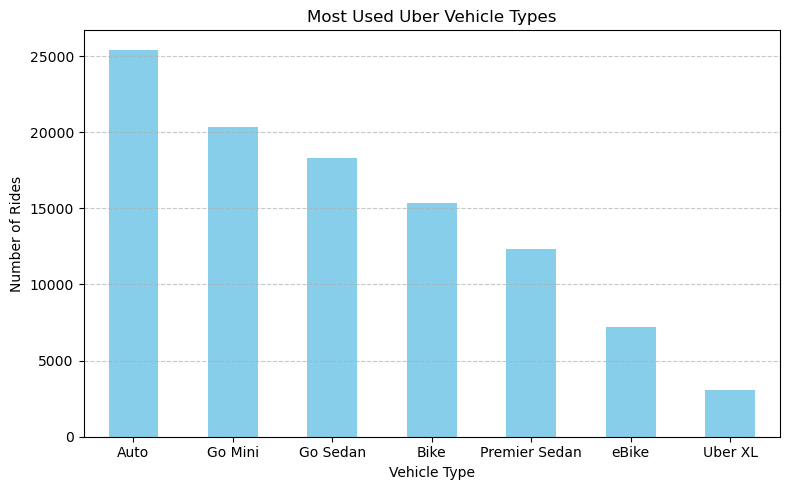

In [17]:
# Count of rides per vehicle type
vehicle_counts = df['Vehicle Type'].value_counts()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
vehicle_counts.plot(kind='bar', color='skyblue')
plt.title('Most Used Uber Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- distribution of ride volume by vehicle type

Auto was the most frequently used vehicle type, followed by Go Mini and Go Sedan. These three make up the bulk of ride requests, suggesting that users prefer more affordable and compact options. Uber XL and eBikes had the lowest usage, which could be due to higher pricing or limited availability.

### Top pick up and Drop Locations 



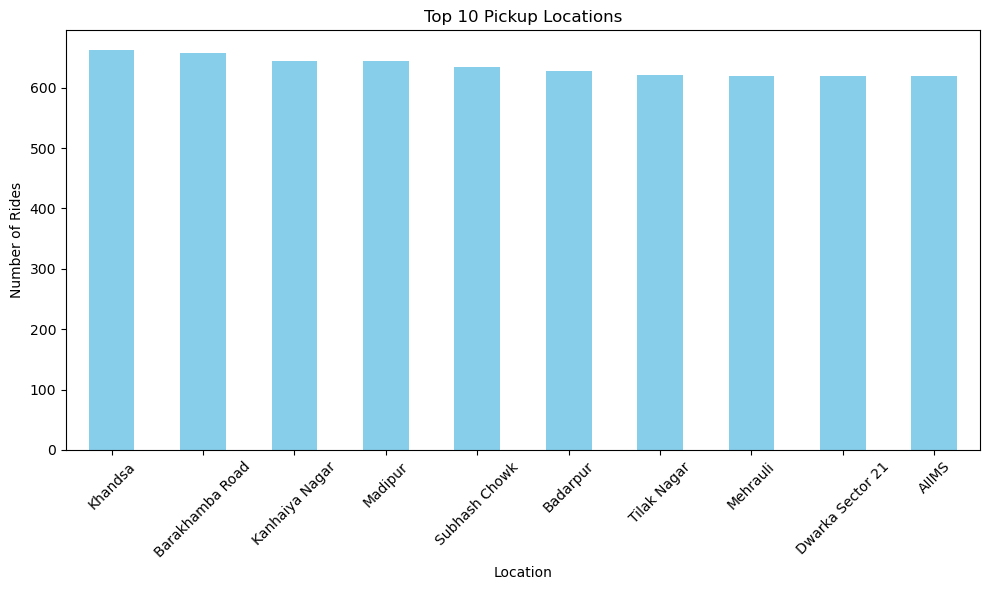

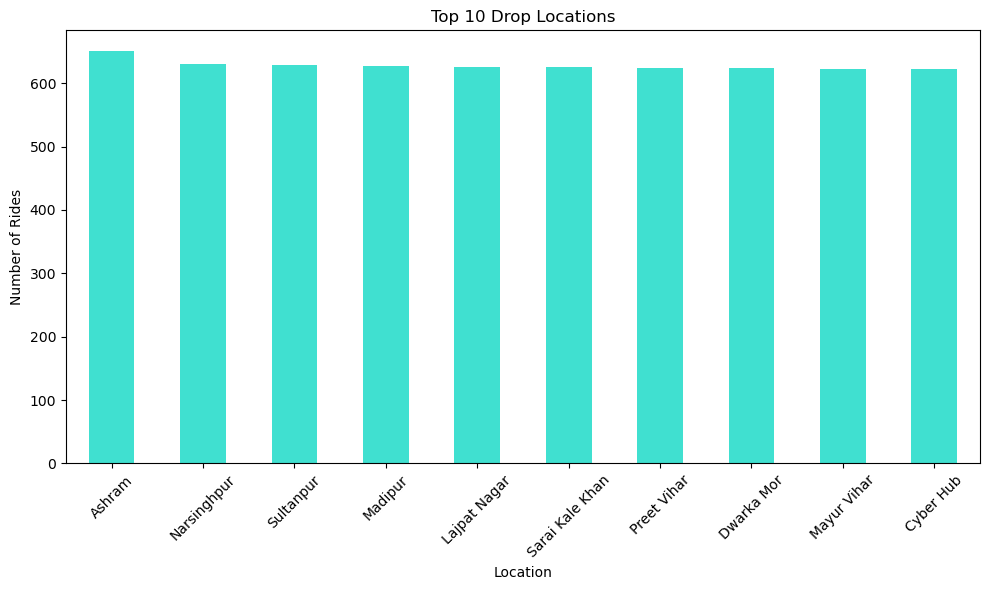

In [18]:
import matplotlib.pyplot as plt

# Top 10 Pickup Locations
top_pickups = df['Pickup Location'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_pickups.plot(kind='bar', color='skyblue')
plt.title('Top 10 Pickup Locations')
plt.xlabel('Location')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Drop Locations
top_drops = df['Drop Location'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_drops.plot(kind='bar', color='turquoise')
plt.title('Top 10 Drop Locations')
plt.xlabel('Location')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Top 10 Pickup Locations**

- The most common pickup spots were:

- Khandsa, Barakhamba Road, and Kanhaiya Nagar topped the list.

- All top 10 locations had over 600 rides each, showing strong user demand across a variety of areas.

- These locations are likely key access points or high-footfall areas like metro stations or business hubs.

**Top 10 Drop Locations**

- The most frequent drop-off points were:

- Ashram, Narsinghpur, and Sultanpur ranked highest.

- There’s some overlap (e.g., Madipur) between pickup and drop locations, indicating recurring travel patterns.

- These could be destinations for work, home, or transport hubs.



The consistency in pickup and drop volumes suggests strongly defined commuter corridors. These hotspots could be prioritized for marketing, driver allocation, or introducing new services (e.g., pooling, incentives). It may also reflect where demand is most predictable.

### Revenue Trends

**Monthly Total Revenue**


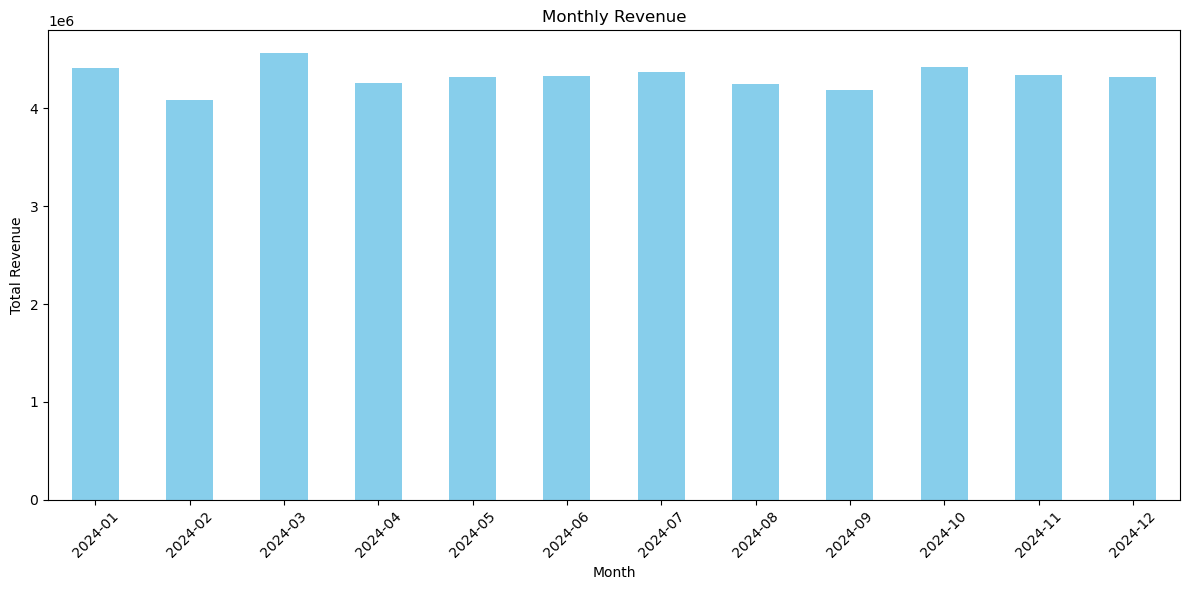

In [19]:
# Extracting month from Booking Datetime
df['Month'] = df['Booking Datetime'].dt.to_period('M')

# Group by month and calculate total revenue
monthly_revenue = df.groupby('Month')['Booking Value'].sum()

# Plot
monthly_revenue.plot(kind='bar', color='skyblue', figsize=(12,6), title='Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Revenue remained relatively stable throughout the year, with only minor fluctuations.

- March saw the highest total revenue, followed by January and October.

- The lowest revenue was recorded in February, which may be due to fewer days or seasonal dips.

Overall, Uber maintained a strong and consistent revenue stream across all months, indicating steady demand and usage.

### Revenue by Vehicle Type


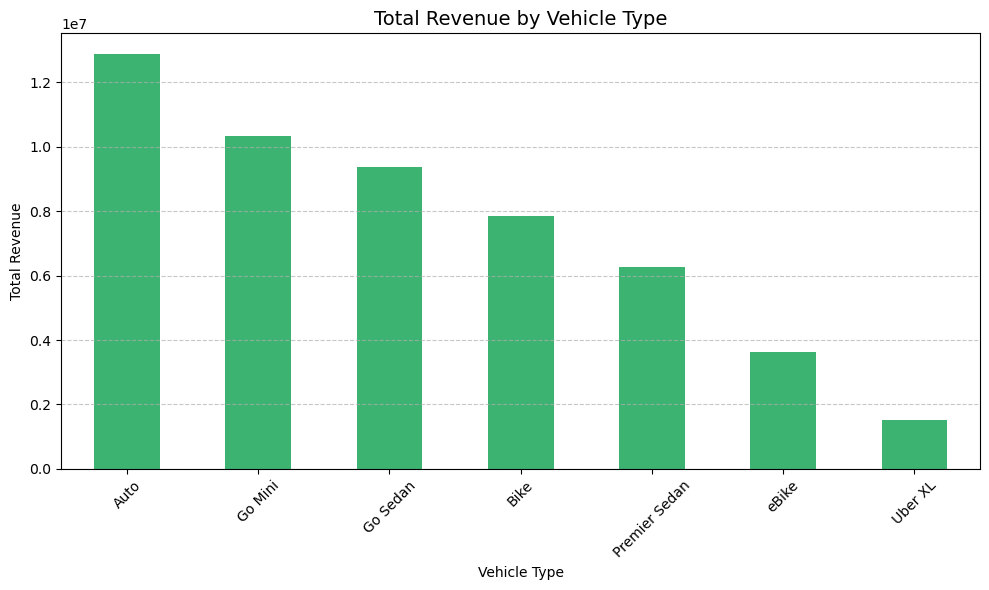

In [20]:
# Grouping by vehicle type and sum the revenue (Booking Value)
revenue_by_vehicle = df.groupby('Vehicle Type')['Booking Value'].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
revenue_by_vehicle.plot(kind='bar', color='mediumseagreen')

plt.title('Total Revenue by Vehicle Type', fontsize=14)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- **Auto** leads by a wide margin in total revenue. This suggests high demand and frequent usage, likely due to affordability and availability.
- **Go Mini** and **Go Sedan** follow closely, showing their role as preferred low-to-mid-range ride options.
- While **Uber XL** and **eBike** have fewer rides, they may still serve niche markets.
- This data helps Uber evaluate which vehicle categories contribute most to revenue, informing future investment, pricing, and fleet decisions.

### Average Revenue per Ride by Vehicle Type

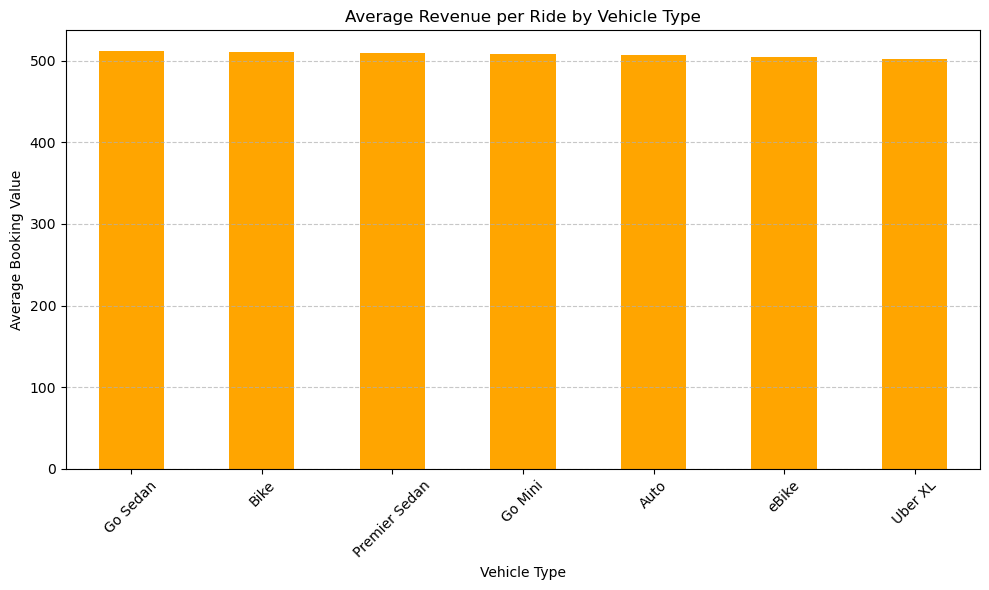

In [21]:
# Average Revenue per Ride by Vehicle Type
avg_revenue = df.groupby('Vehicle Type')['Booking Value'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
avg_revenue.plot(kind='bar', color='orange')
plt.title('Average Revenue per Ride by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Booking Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



- The Go Sedan and Bike categories lead slightly in average revenue per ride, followed very closely by Premier Sedan, Go Mini, and Auto.

- Despite differences in total ride volumes, the average revenue per trip remains fairly consistent across all vehicle types, clustering around the 500 mark.

- This suggests that pricing is relatively standardized regardless of vehicle class, likely due to consistent base fares or trip lengths

### Distribution of Customer & Driver Ratings

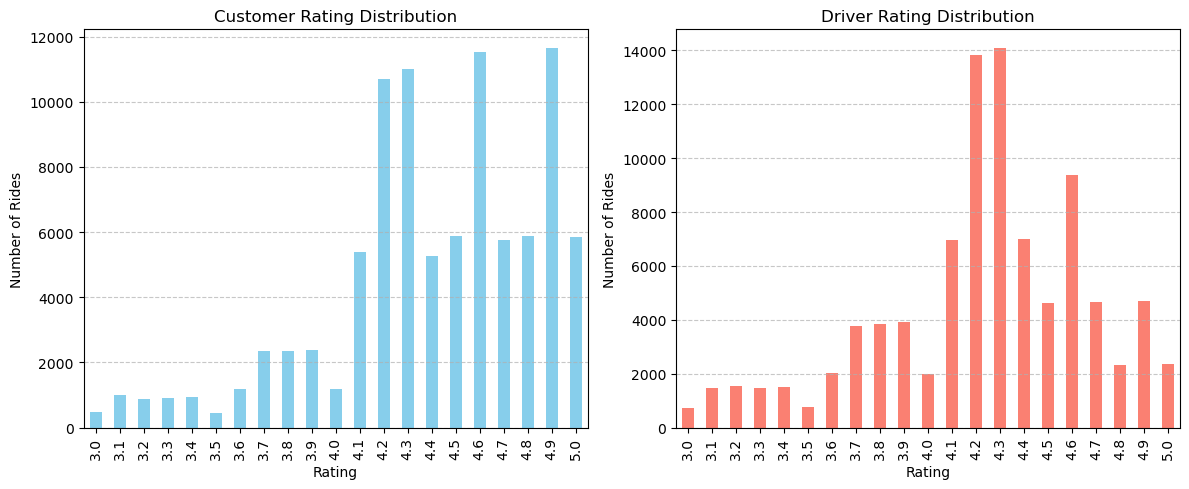

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Customer Rating
df['Customer Rating'].value_counts().sort_index().plot(
    kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Customer Rating Distribution')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Rides')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Driver Rating
df['Driver Ratings'].value_counts().sort_index().plot(
    kind='bar', color='salmon', ax=axes[1])
axes[1].set_title('Driver Rating Distribution')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Number of Rides')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



**Customer Ratings**

The majority of customers gave ratings between 4.2 and 4.9, with visible peaks around 4.2, 4.3, 4.6, and 4.9. This suggests overall high satisfaction with rides, although there's a slight spread indicating some inconsistency in experiences. Very few ratings fall below 3.5, meaning most users had generally good experiences.

**Driver Ratings**

Driver ratings follow a slightly different pattern. While there’s still a concentration between 4.1 and 4.6, there’s more variation, with a large number of ratings at 4.2, 4.3, and 4.6. However, driver ratings seem to be a bit lower on average than customer ratings, and more spread out. This could reflect a broader range of performance among drivers or more critical feedback from passengers.

### Customer & Driver Ratings vs Booking Completion

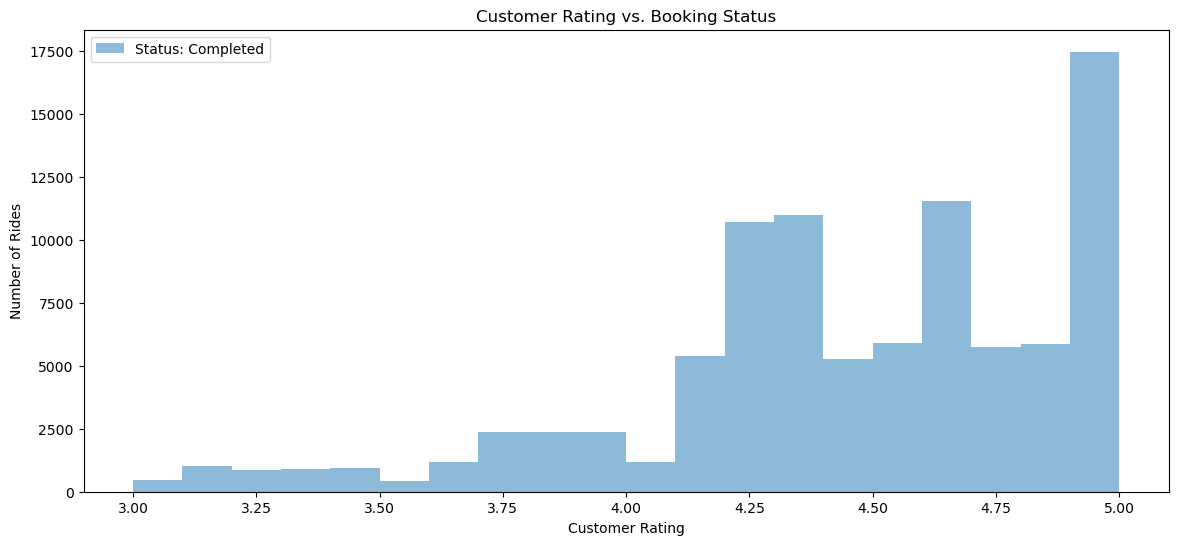

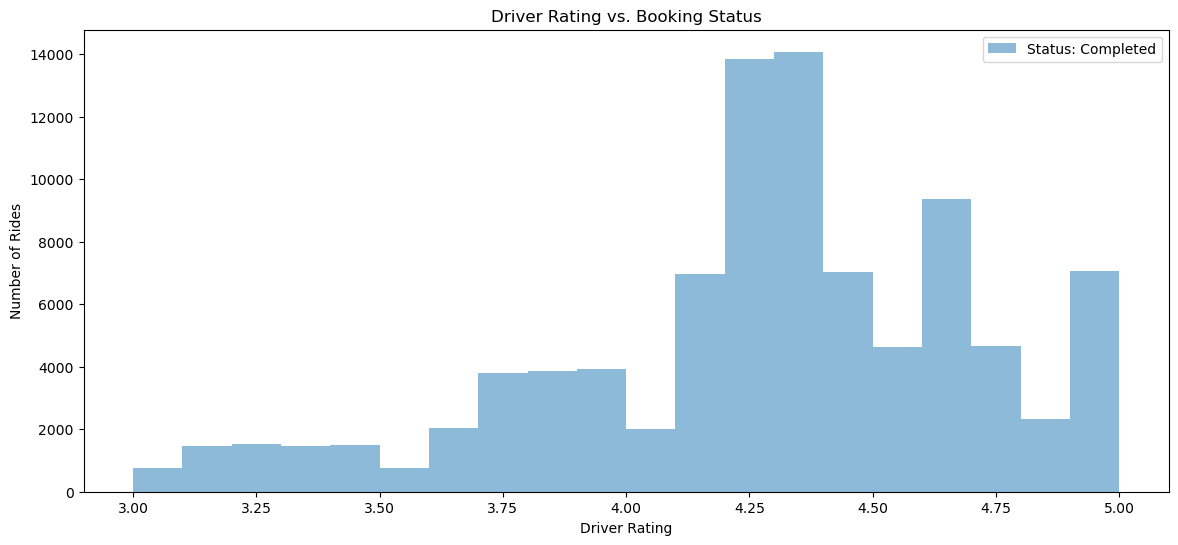

In [23]:
import matplotlib.pyplot as plt

# Dropping rows with missing ratings or booking status
df_filtered = df.dropna(subset=['Customer Rating', 'Driver Ratings', 'Booking Status'])

# Customer Rating vs. Booking Status
plt.figure(figsize=(14, 6))
for status in df_filtered['Booking Status'].unique():
    subset = df_filtered[df_filtered['Booking Status'] == status]
    plt.hist(subset['Customer Rating'], bins=20, alpha=0.5, label=f'Status: {status}')
plt.title('Customer Rating vs. Booking Status')
plt.xlabel('Customer Rating')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()


# Driver Rating vs. Booking Status
plt.figure(figsize=(14, 6))
for status in df_filtered['Booking Status'].unique():
    subset = df_filtered[df_filtered['Booking Status'] == status]
    plt.hist(subset['Driver Ratings'], bins=20, alpha=0.5, label=f'Status: {status}')
plt.title('Driver Rating vs. Booking Status')
plt.xlabel('Driver Rating')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()


- In both graphs, most completed rides are clustered around higher rating scores, especially between 4.2 and 5.0.

- For customers, this suggests that users who rate higher tend to follow through with their bookings, possibly because they’re more satisfied with the service, are more experienced, or simply more engaged.

- For drivers, the same applies: high rated drivers tend to complete more rides, possibly because they’re more professional, punctual, or provide better service, leading to smoother trips.

- There’s a noticeable drop in ride completions below 4.0 for both customers and drivers.

- This could suggest that lower-rated customers and drivers are associated with more booking issues, cancellations, or incomplete rides.

### Correlation between ratings and ride success/cancellations


In [24]:
# Total number of rides
total_rides = df.shape[0]

# Number of incomplete (cancelled/failed) rides
incomplete_rides = df[df['Booking Status'] == 'Incomplete'].shape[0]

# Cancellation rate
cancellation_rate = (incomplete_rides / total_rides) * 100

print(f"Total Rides: {total_rides}")
print(f"Incomplete Rides: {incomplete_rides}")
print(f"Cancellation Rate: {cancellation_rate:.2f}%")


Total Rides: 102000
Incomplete Rides: 9000
Cancellation Rate: 8.82%



Out of 102,000 total rides, about 9,000 didn’t go through, meaning they were either canceled or left incomplete.
That gives us a cancellation rate of 8.82%, or roughly 1 in every 11 rides not being completed, that can affect customer trust, driver earnings, and overall platform reliability.

Next we'll look into why, when, and where these cancellations happen, this could help reduce friction, and create smoother rides for everyone.


### Trends in Cancellations by Hour / Day / Location

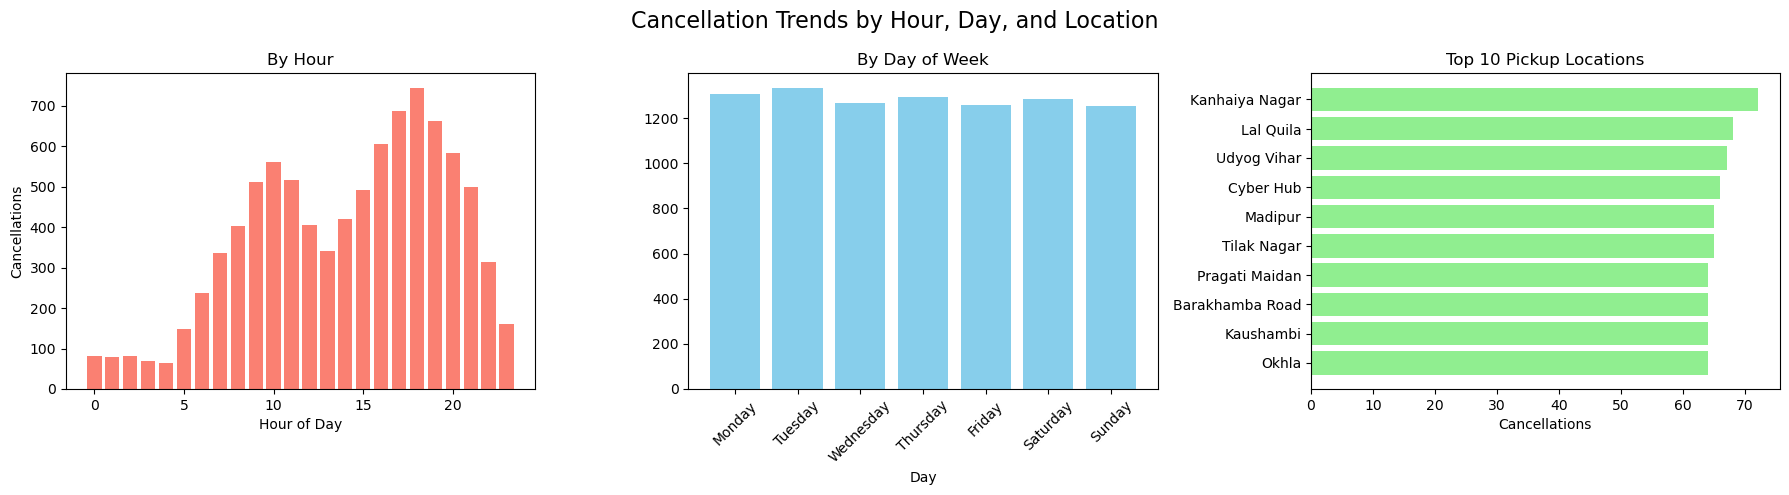

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtering only canceled/incomplete bookings
canceled_df = df[df['Booking Status'] != 'Completed'].copy()

# Converting datetime if not already
canceled_df['Booking Datetime'] = pd.to_datetime(canceled_df['Booking Datetime'])

# Extracting day of week
canceled_df['Day of Week'] = canceled_df['Booking Datetime'].dt.day_name()

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Cancellation Trends by Hour, Day, and Location', fontsize=16)

# 1. Cancellations by Hour
hour_counts = canceled_df['Hour'].value_counts().sort_index()
axs[0].bar(hour_counts.index, hour_counts.values, color='salmon')
axs[0].set_title('By Hour')
axs[0].set_xlabel('Hour of Day')
axs[0].set_ylabel('Cancellations')

# 2. Cancellations by Day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = canceled_df['Day of Week'].value_counts().reindex(day_order)
axs[1].bar(day_counts.index, day_counts.values, color='skyblue')
axs[1].set_title('By Day of Week')
axs[1].set_xlabel('Day')
axs[1].tick_params(axis='x', rotation=45)

# 3. Cancellations by Pickup Location (Top 10)
top_locations = canceled_df['Pickup Location'].value_counts().head(10)
axs[2].barh(top_locations.index[::-1], top_locations.values[::-1], color='lightgreen')
axs[2].set_title('Top 10 Pickup Locations')
axs[2].set_xlabel('Cancellations')

plt.tight_layout()
plt.show()


Cancellations by hour of the day peaks between 5–7 PM, likely due to traffic, long wait times, or drivers being far or finishing another ride. Monday and Tuesday show slightly higher cancellations by day of the week, possibly because rides are more time sensitive early in the week. Locations like Kanhaiya Nagar and Lal Quila see more cancellations, which might be due to access challenges, safety concerns at certain hours, mismatched vehicle details, or group size issues. Overall, cancellations seem tied to urgency, timing, and pickup complexity, especially during rush hours and at tricky locations.

### Payment Methods 

**Most used payment methods**

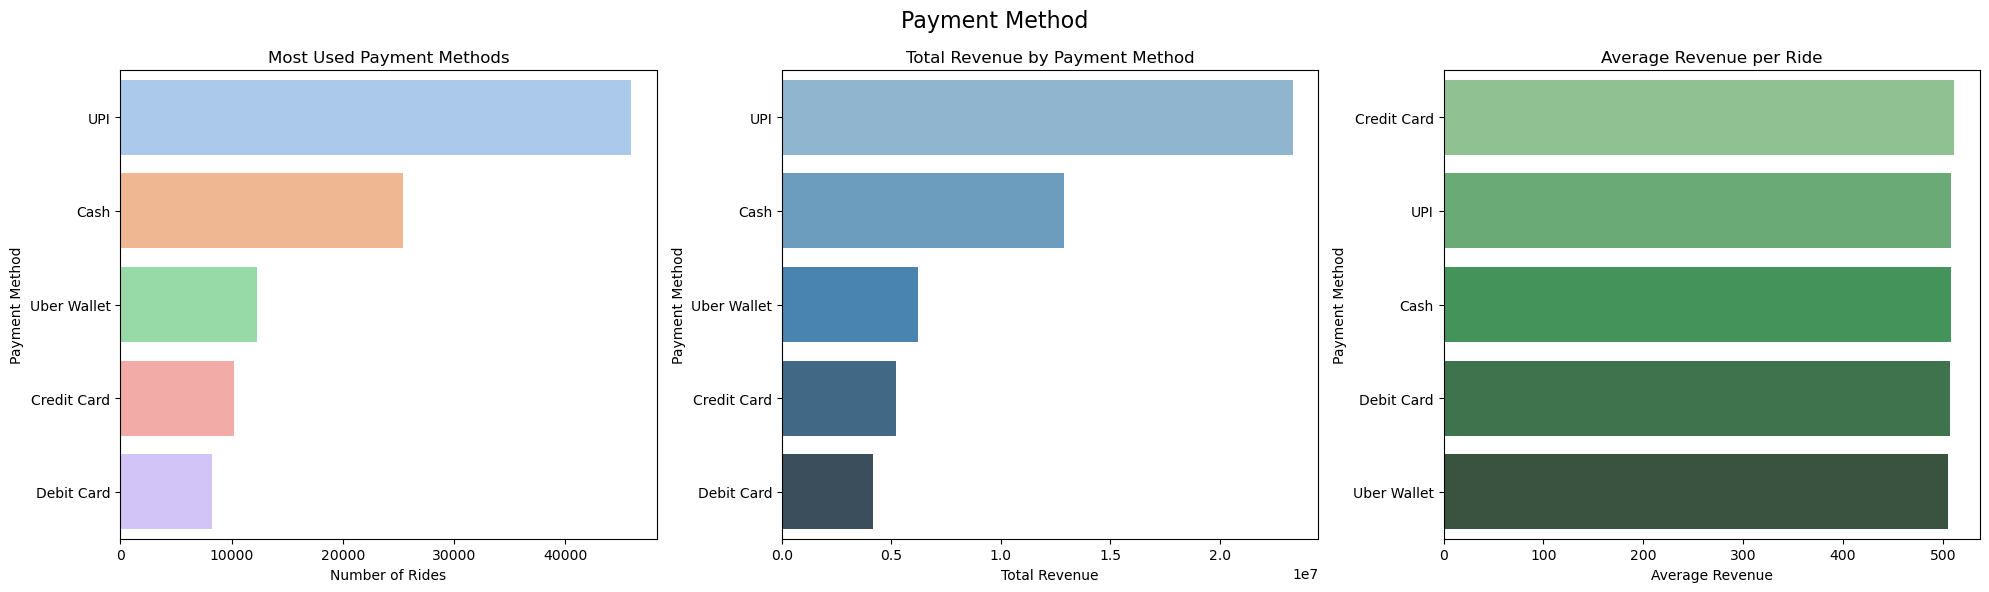

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each payment method
payment_counts = df['Payment Method'].value_counts()

# Total revenue by payment method
revenue_by_payment = df.groupby('Payment Method')['Booking Value'].sum().sort_values(ascending=False)

# Average revenue per ride by payment method
avg_revenue_by_payment = df.groupby('Payment Method')['Booking Value'].mean().sort_values(ascending=False)

# Subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Payment Method', fontsize=16)

# Most used methods
sns.barplot(x=payment_counts.values, y=payment_counts.index, ax=axes[0], palette='pastel')
axes[0].set_title('Most Used Payment Methods')
axes[0].set_xlabel('Number of Rides')
axes[0].set_ylabel('Payment Method')

# Total revenue
sns.barplot(x=revenue_by_payment.values, y=revenue_by_payment.index, ax=axes[1], palette='Blues_d')
axes[1].set_title('Total Revenue by Payment Method')
axes[1].set_xlabel('Total Revenue')

# Average revenue
sns.barplot(x=avg_revenue_by_payment.values, y=avg_revenue_by_payment.index, ax=axes[2], palette='Greens_d')
axes[2].set_title('Average Revenue per Ride')
axes[2].set_xlabel('Average Revenue')
plt.tight_layout()
plt.show()


UPI leads the way as the most popular payment option, handling the highest number of rides and bringing in the most revenue overall, clearly a favorite among customers for speed and convenience. Cash comes in second, likely due to riders without digital wallets or in areas with poor internet. Interestingly, Credit Cards generate the highest average revenue per ride, possibly because they’re used for longer or more premium trips.

### Location Based Revenue

**Pickup Location**

In [30]:
# Grouping by Pickup Location
pickup_revenue = df.groupby('Pickup Location')['Booking Value'].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)

# Renaming columns 
pickup_revenue.columns = ['Total Revenue', 'Average Revenue per Ride', 'Number of Rides']

# View top 10
pickup_revenue.head(10)


,Total Revenue,Average Revenue per Ride,Number of Rides
Pickup Location,,,
Barakhamba Road,341154.0,518.471125,658
Khandsa,338502.0,511.332326,662
Subhash Chowk,329386.0,518.718110,635
Pataudi Chowk,328572.0,536.882353,612
Badarpur,327193.0,521.007962,628
Tughlakabad,326283.0,538.420792,606
AIIMS,325733.0,526.224556,619
Inderlok,325358.0,533.373770,610
Mayur Vihar,322409.0,536.454243,601


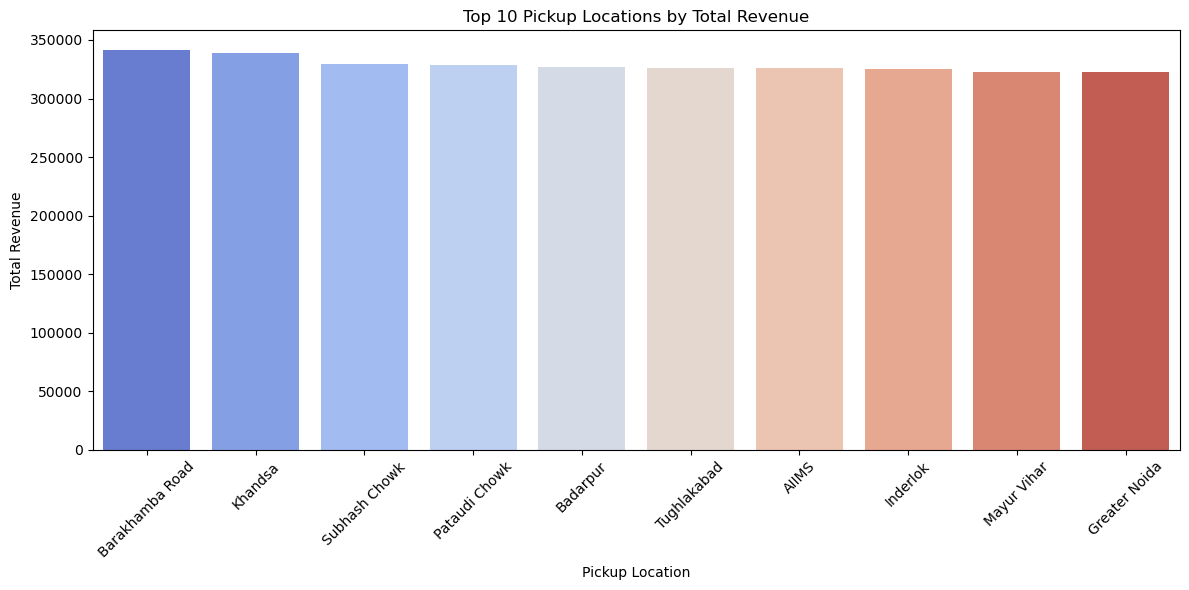

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = pickup_revenue.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10.index, y=top10['Total Revenue'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Pickup Locations by Total Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Pickup Location')
plt.tight_layout()
plt.show()


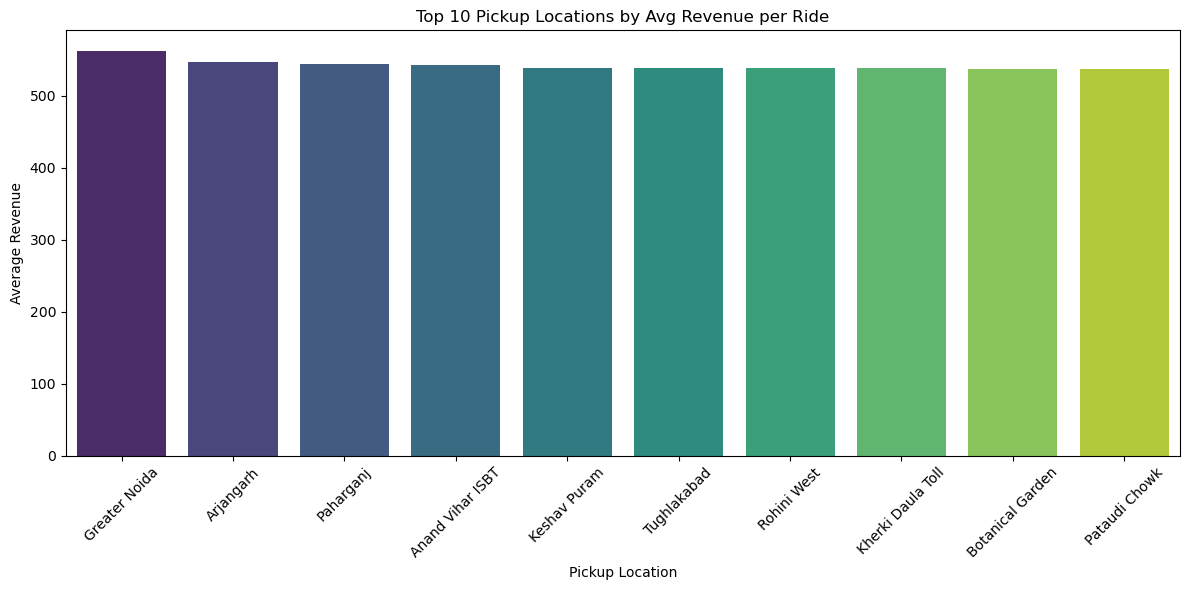

In [32]:
top10_avg = pickup_revenue.sort_values(by='Average Revenue per Ride', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10_avg.index, y=top10_avg['Average Revenue per Ride'], palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Pickup Locations by Avg Revenue per Ride')
plt.ylabel('Average Revenue')
plt.xlabel('Pickup Location')
plt.tight_layout()
plt.show()


From the top 10 pickup points, Barakhamba Road, Khandsa, and Subhash Chowk are leading in total revenue, driven by a high number of rides. These zones seem to be consistently busy, making them key revenue hotspots.

Average revenue per ride, Greater Noida stands out. even with fewer trips, each ride earns significantly more on average (562). This suggests longer or more premium rides originate here. Locations like Arjangarh, Paharganj, and Tughlakabad also show strong per ride value.

### Final Summary & Recommendations

- Mitigate Peak Hour Cancellations
Introduce real time driver ETA alerts or flexible pricing during peak windows (5 to 7 PM) to reduce cancellations and improve rider satisfaction.

- Strengthen UPI Incentives
Since UPI dominates usage, Uber could double down with discounts or loyalty points to encourage repeat usage and improve cashless adoption.

- Boost Visibility in High Value Zones
Allocate more drivers or run geo-targeted promotions in areas like Greater Noida to capture high revenue rides, even if they’re less frequent.

- Address High Cancellation Pickup Spots
Review infrastructure, navigation issues, or pickup logistics around top cancellation locations to improve completion rates.

- Promote Reliable Payment Methods
Explore nudging new users toward wallets or cards, which seem to align with higher value rides, potentially improving platform revenue and reducing cash-handling friction.